# SMARTS (SMiles ARbitrary Target Specification)
<br><br>

> 참고
* [Daylight](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
* [RDKit](https://www.rdkit.org/)

SMARTS | SMILES
---- | ----
Molecular pattern | Molecular structure

### Introduction

* `SMiles ARbitrary Target Specification`
* 분자의 패턴이나 성질을 표현하기 위한 언어이다.
* 컴퓨터 프로그램에서 물질의 디지털 표현에 이용.
 > 특정 작용기를 강조하는 것 <br>
 `drug design`-*database*에 유사 구조, 특성을 가진 물질 찾기 <br>
 분석화학-모르는 물질의 구조와 특성을 예측하기

* SMARTS는 SMILES의 연장선이며, 확장된 규칙으로 구조를 구분지을 수 있게 해준다.
> `SMILES`의 모든 기호(atoms & bonds)과 성질표현(원자의 표현, 전하, 이성질체의 명시)들은 `SMARTS`에서도 유효하다. <br>
 `SMARTS`는 확장된 논리적 연산자들과 부가적인 분자 표현법도 가지고있다. <br>
  
* `SMARTS`를 이용해 유연하고 효과적인 특정 구조 찾기가 가능하다.
* 구조적 패턴을 일반성과 특수성의 여러 단계로 표현할 수 있다.
 
**SMILES** |-| **SMARTS** |-
---- | ---- | ---- | ----
[CH4] | methane | [CH4] | methane
C | methane | C | `carbon atoms` with any number of hydrogens



> SMILES에선 methane을 `C` or `[CH4]`로 표현할 수 있다<br>
> SMARTS 에서 methane은 `[CH4]`이다. ( **High specificity SMARTS** ) <br>
 `[CH4]`는 **4개의 수소를 갖는 지방족 탄소 원자를 의미**하며, `ehtane`, `ethene`, `cyclopentane`의 탄소 원자들과 다르다.

> 반대로 SMARTS에서 `C`는 수소의 갯수가 4개가 아닌 지방족 탄소원자들도 포함한다. ( **Low specificity SMARTS** ) <br>
 `ehtane`, `ethene`, `cyclopentane`의 **탄소 원자들이 될 수도 있다.**
>> 단독으로 쓰인 smarts code `C`는 `ehtane`, `ethene`, `cyclopentane`의 탄소 원자에 포함된다.

In [1]:
#RDkit 적용
from __future__ import print_function #2.X대 python호환을 위해
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

**기준.HasSubstructMatch(비교대상)**<br>
일치하면 `True`, 일치하지 않으면 `False`를 출력한다<br>
**기준.GetSubstructMatch(비교대상)**<br>
포함이 된다면 포함되는 번째의 수를 낮은 숫자부터 모두 출력한다<br>
(n,)<Br>
포함이 되지 않는다면 ()을 출력한다.

In [3]:
m1 = AllChem.MolFromSmiles('C')
m2 = AllChem.MolFromSmiles('[CH4]')

m3 = AllChem.MolFromSmarts('C')
m4 = AllChem.MolFromSmarts('[CH4]')

In [4]:
m1.HasSubstructMatch(m2)

True

In [5]:
m1.HasSubstructMatch(m3)

True

In [6]:
m1.HasSubstructMatch(m4)

True

In [7]:
m2.HasSubstructMatch(m3)

True

In [8]:
m2.HasSubstructMatch(m4)

True

In [9]:
m3.HasSubstructMatch(m1)

True

In [10]:
m3.HasSubstructMatch(m2)

True

In [11]:
m3.HasSubstructMatch(m4)

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code\GraphMol\Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2018.03.3
	BOOST: 1_66


In [12]:
m3.GetSubstructMatch(m4)

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code\GraphMol\Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2018.03.3
	BOOST: 1_66


In [13]:
m4.HasSubstructMatch(m1)

True

In [14]:
m4.HasSubstructMatch(m2)

True

In [15]:
m4.HasSubstructMatch(m3)

True

In [16]:
m2.GetSubstructMatch(m1)

(0,)

In [17]:
m3.GetSubstructMatch(m1)

(0,)

In [18]:
m3.GetSubstructMatch(m2)

(0,)

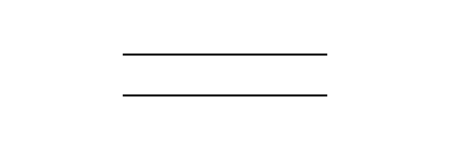

In [19]:
#m1.HasSubstructMatch(m4)
e = AllChem.MolFromSmiles('C=C')
e

In [20]:
# m3 = AllChem.MolFromSmarts('C')
# m4 = AllChem.MolFromSmarts('[CH4]')
m3.HasSubstructMatch(e)

False

In [21]:
m4.HasSubstructMatch(e)

False

In [22]:
m5 = AllChem.MolFromSmarts('CC')
m5.HasSubstructMatch(e)

False

In [23]:
m6 = AllChem.MolFromSmarts('C=C')
m6.HasSubstructMatch(e)

True

In [24]:
e.HasSubstructMatch(m5)

False

In [25]:
e.HasSubstructMatch(m6)

True

In [26]:
e.HasSubstructMatch(m1)

True

In [27]:
e.HasSubstructMatch(m2)

True

In [28]:
e.HasSubstructMatch(m3)

True

In [29]:
e.HasSubstructMatch(m4)

False

In [30]:
e.GetSubstructMatch(m1)

(0,)

In [31]:
e.GetSubstructMatch(m2)

(0,)

In [32]:
e.GetSubstructMatch(m3)

(0,)

In [33]:
e.GetSubstructMatch(m4)

()

In [34]:
e.GetSubstructMatch(m6)

(0, 1)

### 1.Atomic Primitives
* SMARTS는 SMILES에서 사용되는 원자의 특징(원자 기호, 전하, 이성질체의 명시)보다 더 큰 범주의 많은 원자의 표현을 제공한다.
* <**n**> : 숫자 , <**c**> : chiral class

Symbol | Symbol name | Atomic property requirements | Default
---- | ---- | ----| ----
* | wildcard | any atom | (no default)
a | aromatic | aromatic | (no default)
A | aliphatic | aliphatic | (no default)
D<$n$> | degree | <$n$> explicit connections | exactly one
H<$n$> | total-H-count | <$n$> attached hydrogens | exactly one
h<$n$> | implicit-H-count | <$n$> implicit hydrogens | at least one
R<$n$> | ring membership | in <$n$> SSSR rings | any ring atom
r<$n$> | ring size | in smallest SSSR ring of size <$n$> | any ring atom
v<$n$> | valence | total bond order <$n$> | exactly one
X<$n$> | connectivity | <$n$> total connections | exactly one
x<$n$> | ring connectivity | <$n$> total ring connections | at least one
- <$n$> | negative charge | -<$n$> charge | -1 charge (-- is -2, etc)
+<$n$> | positive charge | +<$n$> formal charge | +1 charge (++ is +2, etc)
#n | atomic number | atomic number <$n$> | (no default)
@ | chirality | anticlockwise | anticlockwise, default class
@@ | chirality | clockwise | clockwise, default class
@<$c$><$n$> | chirality | chiral class <$c$> chirality <$n$> | (nodefault)
@<$c$><$n$>? | chiral or unspec | chirality <$c$><$n$> or unspecified | (no default)
<$n$> | atomic mass | explicit atomic mass | unspecified mass

**Examples**

Symbol | Atomic property requirements
---- | ----
C | aliphatic carbon atom
c | aromatic carbon atom
a | aromatic atom
[#6] | carbon atom
[Ca] | calcium atom
[++] | atom with a +2 charge | 
[R] | atom in any ring
[D3] | atom with 3 explicit bonds (implicit H's don't count)
[X3] | atom with 3 total bonds (includes implicit H's)
[v3] | atom with bond orders totaling 3 (includes implicit H's)
C[C@H](F)O | match chirality (H-F-O anticlockwise viewed from C)
C[C@?H](F)O | matches if chirality is as specified or is not specified